   # Исследование продаж компьютерных игр

    Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать   ставку на потенциально популярный продукт и спланировать рекламные кампании.  
    
    Перед вами данные до 2016 года. Нужно отработать принцип работы с данными. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.

**Цель исследования:**  
  1. Выявить определяющие успешность игры закономерности.  
  
   **Ход исследования:**  
     Данные я получу из файла `'/datasets/games.csv'`. Я проверю данные на ошибки, оценю их влияние на исследование. Где необходимо заменю названия и типы столбцов. Добавлю необходимые столбы и приступлю к анализу.  
     
   В процессе анализа необходимо ответить на следующие вопросы:
   - сколько игр выпускалось в разные годы?
   - как менялись продажи по платформам?
   - за какой характерный срок появляются новые и исчезают старые платформы?
   - какие платформы лидируют по продажам, растут или падают?
   - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? 
   - каково общее распределение игр по жанрам? 
   - что можно сказать о самых прибыльных жанрах? 
   - выделяются ли жанры с высокими и низкими продажами?  
  
   Исследование пройдет в 6 этапов:  
       - Получение и обзор данных.
       - Преобработка данных.
       - Анализ данных.
       - Составление портрета пользователя.
       - Проверка заданных гипотез.
       - Написание общего вывода.






### Открытие файла с данными и изучение общей информации.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


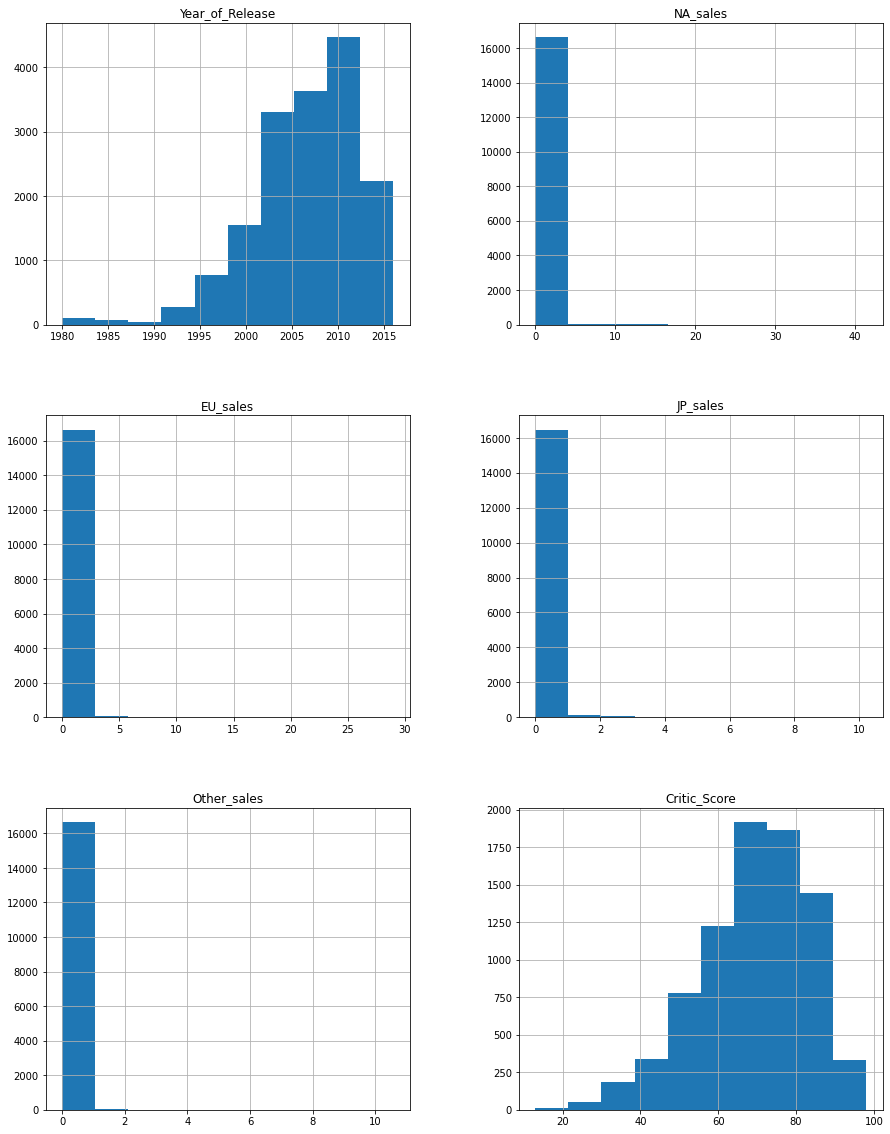

In [3]:
df.hist(figsize=(15, 20))
pass

**Вывод:**
Данные состоят из 16715 срок и 11 столбцов.  
Много пропусков в последних трех столбцах `рейтинг критиков`, `рейтинг пользователей`  и `рейтинг ESRB`. Остальные данные почти все заполнены.  
Не верный формат имеют столбцы `Year_of_Release`, `Critic_Score`, `User_Score` .  
Есть 2 пропуска в столбцах `Name`, `Genre` (возможно это одни и теже строки). 
Надо поменять названия всех столбцов перевести в нижний регистр.
По гистограммам видно, что:
- в данных присутствуют сильные выбросы в столбцах с количеством проданных копий. (отфильтровывать нельзя, это бестселлеры)
- игры начали хорошо продаваться после 1990 года.
- критики склонны положительно оценивать компьютерные игры. (гисторгамма смещена вправо)

### Преобработка данных.

#### Названия столбцов

In [4]:
df.columns = [s.lower() for s in df.columns]

Привели названия столбцов к нижнему регистру.

#### Пропущенные значения.

In [5]:
print(f"Пропущенных значений в столбце 'name': {df['name'].isna().sum()}")
df.dropna(subset=['name'], inplace=True)
print(f"Пропущенных значений в столбце 'name': {df['name'].isna().sum()}")

Пропущенных значений в столбце 'name': 2
Пропущенных значений в столбце 'name': 0


In [6]:
print(f"Пропущенных значений в столбце 'genre': {df['genre'].isna().sum()}")

Пропущенных значений в столбце 'genre': 0


In [7]:
print(f"Полных явных дубликатов: {df.duplicated().sum()}")

Полных явных дубликатов: 0


In [8]:
print(f"Пропущенных значений в столбце 'year_of_release': {df['year_of_release'].isna().sum()}")

Пропущенных значений в столбце 'year_of_release': 269


In [9]:
df.dropna(subset=['year_of_release'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df['rating'].fillna('Unknown', inplace=True)
df['rating'].isna().mean()

0.0

Удалил все пропущенные значения в столбцах `name`, `year_of_release`, `genre`. Всего удалено 1,6% данных. Такой объем удаленных данных не должен исказить результаты анализа.

#### Типы столбцов.

In [11]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений столбца `user_score` есть значение `tbd` - `требует уточнения`. Восстановить значение рейтинга я не могу, заменим на NaN.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.loc[df['user_score'] == 'tbd', 'user_score'].count()

0

In [14]:
df['user_score'] = df['user_score'].astype('float64')

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Поменял типы столбцов на соответстующие содержимому. Столбцу `year_of_release` присвоил тип `int64`, т.к. он содержит только год выхода, больше никакой информации о дате нет. При использовании типа `datetime`, он добавит в данные информацию не соответствующюю действительности. (день и месяц выхода игры) 

#### Добавление столбца суммы.

In [17]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Вывод:**  
Удалил пропуски в столцах `name`, `year_of_release`, `genre`, так как заполнить нечем, а объем этих данных всего  ~ 1.6%.   
К пропускам в столбцах `name` могли привести ошибки ввода или ошибки работы БД, пропуски в столбцах `year_of_release`, `genre` могли возникнуть потому что пользователь не указал данные (например не знал) при вводе или так же ошибки БД.  
Заменил типы в столбцах: `critic_score`, `user_score`, `year_of_release` .    
`critic_score` - поменял на `Int64`, т.к. столбец содержит целочисленные значения рейтинга критиков по 100 бальной шкале.  
`user_score` - поменял на `float64`, т.к. столбец содержит дробные числа рейтинга игроков по 10 бальной шкале.  
    значение `tbd`, что значит `требует уточнения` заменил на NaN, потому что заменять на что не понятно, а остальные данные этого столбца надо обрабатывать как числа с запятой.  
Добавил столбец `sum_sales` содержащий сумму продаж по всем регионам.

### Анализ данных.

#### Исследование периодов.

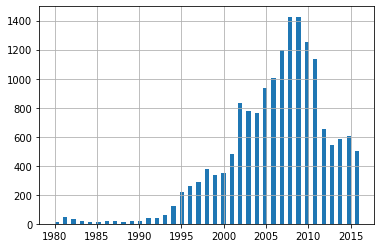

In [18]:
df['year_of_release'].hist(bins=73)
pass

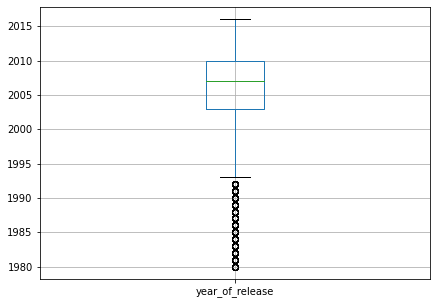

In [19]:
df.boxplot(column='year_of_release', figsize=(7, 5))
pass

Диаграмма показывает, что количество игр до 1993 года можно не учитывать в нашем исследовании.
1. игр очень мало, по сравнению с количеством игр после 2000 года.
2. сам период был давно, смысл данных устарел.
Относительно остальных годов, можно видеть, что <s>игры не выпускал только ленивый</s> игровая индустрия испытывала бурный рост с 1995 по 2010 годы. Потом количество выпускаемых игр резко сокращается. Сильное падение произошло в 2012 году.

<s>**Вывод:**  
**Не все периоды важны для нашего исследования.**</s>

In [20]:
df = df.query('year_of_release > 1993')

**Вывод:**  
**Не все периоды важны для нашего исследования.**  
Не будем рассматривать период до 1993 года.

#### Иследование продаж по платформам.

In [21]:
sales_by_years = df.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc=['sum'])
sales_by_years.columns = [i[1] for i in sales_by_years.columns]
sales_by_years['sum_sales'] = sales_by_years.sum(axis=1)
sales_by_years.sort_values(by='sum_sales', ascending=False, inplace=True)
pass

Сформировали таблицу данных количества проданных копий по годам во всех регионах по каждой платформе.

In [22]:
sales_by_years.head(10)

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,sum_sales
platform,,,,,,,,,,,,,,,,,,,,,,,,
PS2,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.76
PS,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.58
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
GBA,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.88
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,289.53


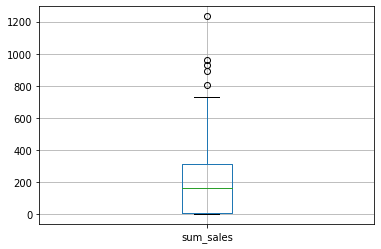

In [23]:
sales_by_years.boxplot(column='sum_sales')
pass

Медиана сумарного количеста проданных копий равна 180 млн.
Отфильтруем платформы для которых было продано меньше 180 млн копий во всех регионах.

In [24]:
sales_by_years = sales_by_years.query('sum_sales > 180')

Построим диаграммы количества проданых копий по годам для первых 5 платформ.

In [25]:
def get_sales_by_years(i):
    sales_by_years.iloc[i][:-1].plot(kind='bar', title=sales_by_years.iloc[i].name,\
                                 xlabel='Год релиза', ylabel='количество проданных копий, млн')
    return

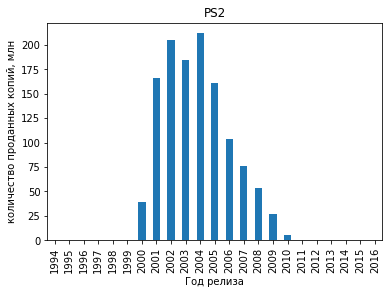

In [26]:
get_sales_by_years(0)
pass

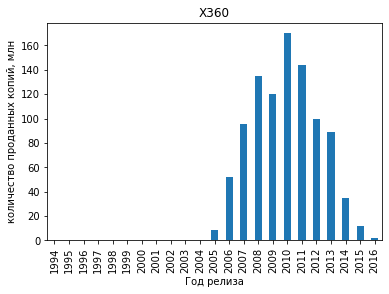

In [27]:
get_sales_by_years(1)
pass

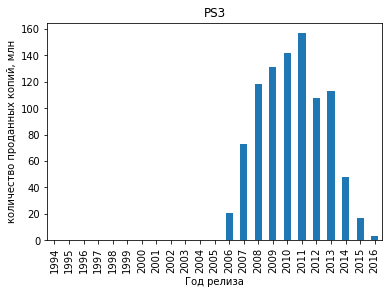

In [28]:
get_sales_by_years(2)
pass

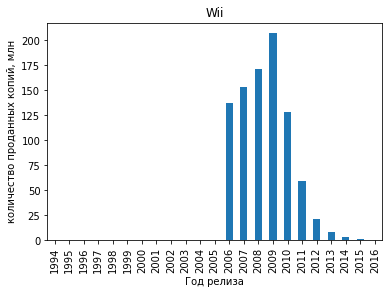

In [29]:
get_sales_by_years(3)
pass

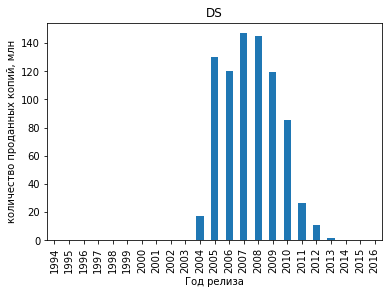

In [30]:
get_sales_by_years(4)
pass

In [31]:
count_year = sales_by_years.iloc[:, :-1].count(axis=1)
count_year.agg(['mean', 'median'])
#sales_by_years.iloc[:, :-1].count(axis=1).sort_values(ascending=False)

mean      10.142857
median    10.000000
dtype: float64

Гистограммы показывают распределение количества проданных копий по года для каждой из первых (по количеству проданных копий) 5 платформ.    
Среднее и медиана количества лет, в течении которых игры для платформ продавались равны соответственно 10.14 и 10 лет.  
При этом если взять все платформы, а не только самые успешные, то среднее и медиана будут равны 7,677 и 7 лет соответственно.  
Это свидетельствует о том, что неудачные платформы надолго на рынке не задерживаются.    
<s>`Можно считать, что характерный срок появлявления новых и исчезновения старых платформ составляет 8 лет.`</s>
<div class = "alert alert-info" style="border-left: 7px solid blue">Можно считать, что характерный срок появлявления новых и исчезновения старых платформ составляет 10 лет.</div>
Это подтверждается и этими гистограммами распределения.

**Вывод:**  
**Пятерка самых прибыльных платформ - `PS2`, `X360`, `PS3`, `Wii`, `DS`.**  
**Характерный срок появлявления новых и исчезновения старых платформ - 10 лет.**

#### Анализ текущей ситуации на рынке игр.

**Актуальным периодом будем считать половину характерного срока - 5 лет.**

In [32]:
df_2011 = df.query('year_of_release > 2011').reset_index(drop=True)

In [33]:
df_actl = df_2011.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

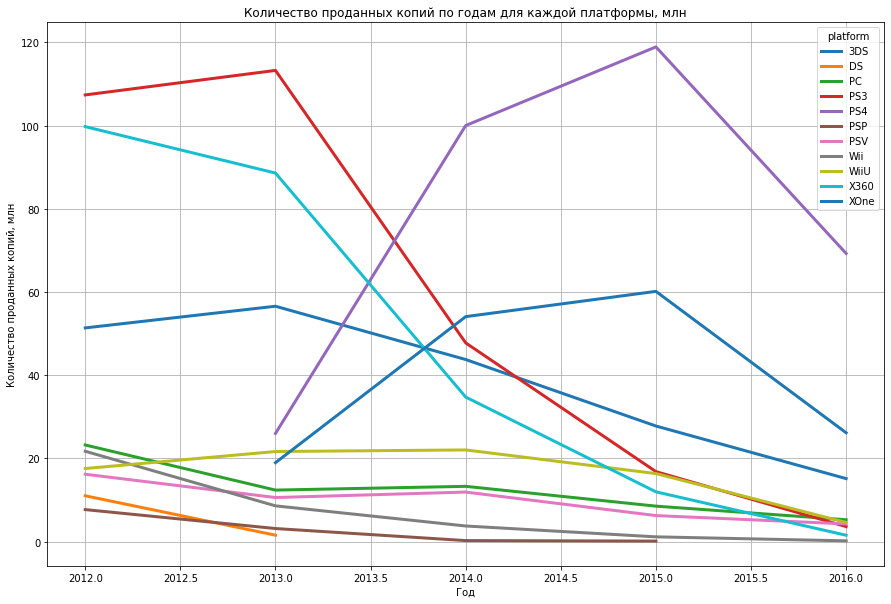

In [34]:
df_actl.plot(figsize=(15,10), linewidth=3, grid=True, title='Количество проданных копий по годам для каждой платформы, млн',\
             xlabel='Год', ylabel='Количество проданных копий, млн')
pass

Судя по графикам <s> пора заканчивать играть и надо начинать работать</s> в 2016 году игровая индустрия находится в упадке. Характерный срок для технологии 8 лет. Те технологии которые начались до 2008 года и принесли большую прибыль уже находятся на стадии своего окончания (`Wii, DS, X360, PS3`), вкладываться в них смысла нет. Несколько новых технологий родились мертвыми, и не поднявшись, демонстрируют спад (`PSV, WiiU`), к тому же с момента их появления прошло 6 лет, а для не очень удачных технологий это почти предельный возраст. Новых взрывных технологий за последние 3 года не появилось. Есть только `PS4` и `XOne`, но они тоже уже прошли свои пики, не поднявшись очень высоко. Отдельно стоит `PC`, никогда не получавшая сверхприбылей, но при этом сушествующая очень давно, и примерно на одинаковых уровнях.  
В целом **все технологии демонстрируют падение**.

**Вывод:**  
 В силу всего вышесказанного при поиске потенциально прибыльных платформ можно рекомендовать следующее:  
  **1. Отказаться от вложений в игровую отрасль в настоящий момент.** 
      Все платформы находятся в падении, в конце или середине характерного срока жизни (кроме `PC`). Новых платформ, появившихся в последний год-два и находящихся не подъеме, нет.  
  **2. Рассмотреть вложения в `PS4` и `XOne` на небольшой срок в пределах `1-2 лет`.**  
  **3. С целью получения постоянной, но небольшой прибыли рассмотреть вложения в `PC`. Исходя из предоставленных данных ограничений по сроку `нет`**.

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
Я забыл, что в условии упоминалось о неполноте данных за 2016г. Принимая во внимание это условие надо критически отнестись к данным о продажах на 2016г. Необходимо оценить:  
    1. тенденцию изменения графиков за последние 3 года (без 2016г). Графики росли или падали.  
    2. время жизни каждой платформы.  
    3. скорость изменения графиков. Круто или плавно падают или растут.  
При таких условиях можно сказать, что `PS4 и XOne` являются очень перспективными платформами. Они находятся в начале своего срока жизни, и предыдущие 2 года показали бурный рост. `PS4` - однозначный выбор, `XOne` - тоже можно рассмотреть.
Вывод о `РС` остается без изменений.   
    
</div>

#### Глобальные продажи игр в разбивке по платформам.

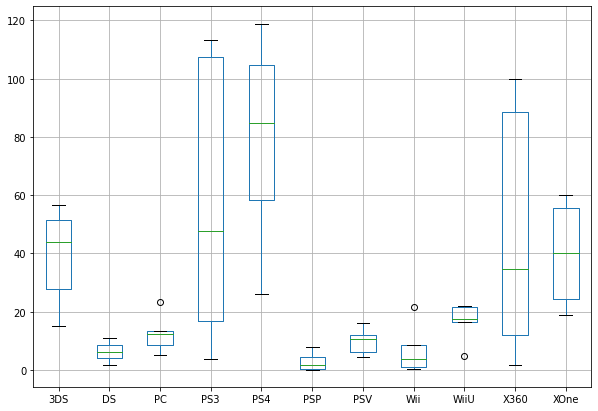

In [35]:
df_actl.boxplot(figsize=(10, 7))
pass

In [36]:
def boxplot_name(name, t, x , y, z=100):
    b = df_2011.boxplot(by=name, column='sum_sales',figsize=(10, 7))
    b.set_title(t)
    b.set_xlabel(x)
    b.set_ylabel(y)
    b.set_ylim(0, z)
    return b

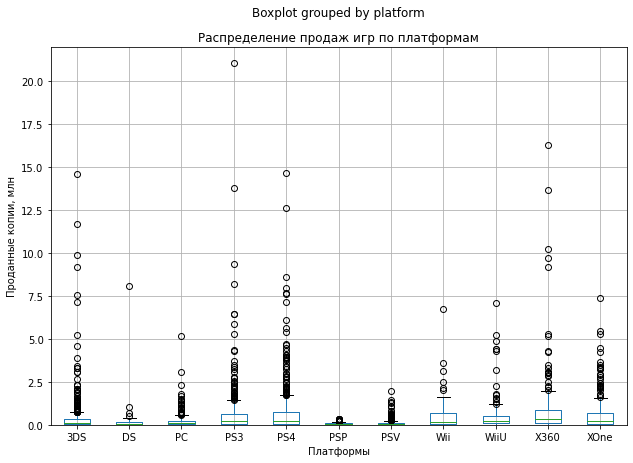

In [37]:
boxplot_name('platform', 'Распределение продаж игр по платформам', 'Платформы', 'Проданные копии, млн', 22)
pass

По этому графику можно сказать, что на всех платформах были игры, которые продавались значительно лучше других. Чем больше было таких игр и чем выше были их продажи, тем можно считать успешнее платформу.   
Рассмотрим подробнее продажи до 4.5 млн. копий (на этом уровне начинается затемнение на самом высоком графике (`PS4`)).

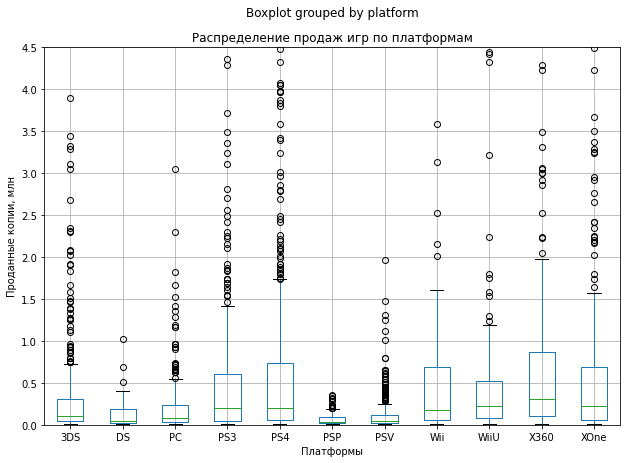

In [38]:
boxplot_name('platform', 'Распределение продаж игр по платформам', 'Платформы', 'Проданные копии, млн', 4.5)
pass

Из этих 2 графиков можно сделать вывод, что самые успешные платформы это `PS3`, `PS4`, `X360`, `XOne`, `3DS`.
Медиана у всех находится примерно на одинаковом уровне, но сам столбец у наших фаворитов выше, значит больше 50 % игр продавалиль лучше, чем у других платформ. И выбросов больше (супер удачных игр). У `Wii` диаграмма выглядит неплохо, но очень удачных игр у них всего несколько штук.  
С учетом того, что до этого мы выяснили в предыдущем разделе, что продажи `PS3`, `X360`, `3DS` предпоследние 2 года падают (2016 не рассматриваем) и характерное время жизни этих платформ подходит к концу, остается признать перспективными только `PS4` и `XOne` и отдать должное `PS3`, `X360`, `3DS`. Это были отличные платформы.

По диаграмме размаха можно сказать следующее:  
Чем дальше столбик стоит от 0, тем меньше было лет с низкими продажами.  
Чем больше столбик, тем больше были продажи.  
Медиана смещена вверх, половина лет с хорошими продажами.    
Верхний ус показывает макимум продаж за лучший год, нижний минимум за худший. (только если ус не равен 1,5 межквартильного размаха).

**Вывод:**  
Самые лучшие платформы `Wii, DS, X360, PS3`. Самые новые, у которых еще есть потенциал `PS4, XOne`.


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

Вывод:    
Самые перспективные платформы PS4, XOne.
</div>

#### Зависимость продаж от отзывов. 

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [39]:
def depend(s=''): # формируем фрейм из 'critic_score','user_score','sum_sales'
    result = df_2011.copy()
    if s:
        result = result.query('platform == @s').reset_index(drop=True)
    result = result.dropna(subset=['critic_score', 'user_score'])
    result.reset_index(drop=True, inplace=True)
    result = result.loc[:,['critic_score','user_score','sum_sales']]
    return result#.query('critic_score > 70')

def depend_plot(x='critic_score', s=''): # график зависимости количества продаж от мнения критиков или игроков по платформе S
    name = {'critic_score':'критиков', 'user_score':'игроков'} 
    depend(s).plot(x=x, y='sum_sales', kind='scatter', title=f'{s} зависимость продаж от {name[x]}',\
                   grid=True, xlabel=f'Оценка {name[x]}', ylabel=f'Количество проданных копий, млн')
    
def depend_corr(x='critic_score', s=''): # корреляция количества продаж от мнения критиков или игроков по платформе S
    name = {'critic_score':'критиков', 'user_score':'игроков'}
    df_corr = depend(s)[[x, 'sum_sales']].corr()['sum_sales'][0]
    if not s : s = 'всех платформ'
    print(f"Корреляция Пирсона между продажами и отзывыми {name[x]} для {s} равна: {df_corr}")

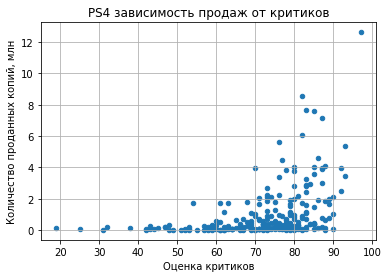

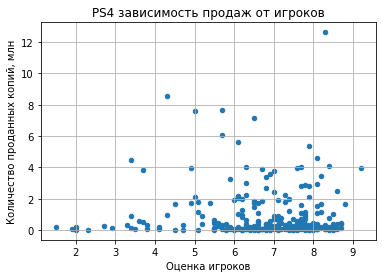

In [40]:
depend_plot('critic_score', 'PS4')
depend_plot('user_score', 'PS4')

Контрольная группа по `XOne`.

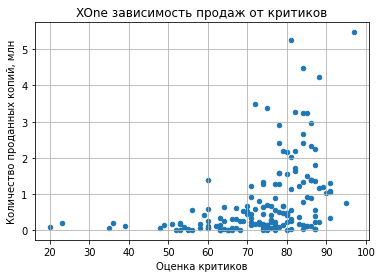

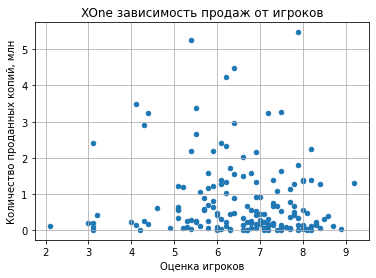

In [41]:
depend_plot('critic_score', 'XOne')
depend_plot('user_score', 'XOne')

График рассеивания показывает, что В ОСНОВНОЙ МАССЕ ОПРЕДЕЛЕННАЯ зависимость количества продаж от мнения критиков и игроков есть, но не очень сильная. При этом влияние мнения критиков значительно более выражено. При этом если рассматривать игры с мнением критиков > 90, то на графике видно что почти все они хорошо продавались.

Проверим корреляцию.

In [42]:
depend_corr(x='critic_score', s='PS4')
depend_corr(x='user_score', s='PS4')

Корреляция Пирсона между продажами и отзывыми критиков для PS4 равна: 0.4058948014583663
Корреляция Пирсона между продажами и отзывыми игроков для PS4 равна: -0.03362497596528893


In [43]:
depend_corr(x='critic_score', s='XOne')
depend_corr(x='user_score', s='XOne')

Корреляция Пирсона между продажами и отзывыми критиков для XOne равна: 0.4104220356129644
Корреляция Пирсона между продажами и отзывыми игроков для XOne равна: -0.09400318326920779


Коэффициент корреляции Пирсона подтверждает, между оценками критиков и количеством проданных копий есть положительная зависимость. Мнение игроков <s>никого не интересует</s> на продажи не влияет.

**Вывод:**  
Мнение критиков влияет на количество проданных копий для платформ `PS4` и `XOne` .    
Мнение критиков имеет среднюю положительную зависимость на продажи.  
Мнение игроков на продажи не влияет.  

#### Соотнесите выводы с продажами игр на других платформах.

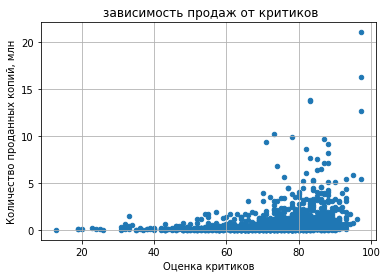

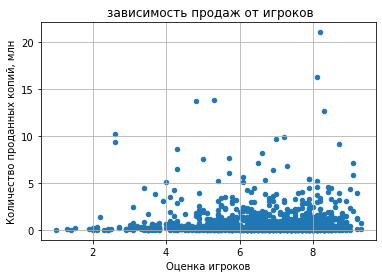

In [44]:
depend_plot('critic_score')
depend_plot('user_score')

In [45]:
depend_corr(x='critic_score')
depend_corr(x='user_score')

Корреляция Пирсона между продажами и отзывыми критиков для всех платформ равна: 0.3065157941292528
Корреляция Пирсона между продажами и отзывыми игроков для всех платформ равна: 0.0005966665040489074


Графики распределения и коэффициент корреляции Пирсона показываеют, что в общем по всем платформам зависимость продаж от отзывов критиков, слабо положительная. При этом для популярных платформ она на 30 % выше.

**Вывод:**  
**1. Зависимость продаж от мнения критиков есть, от мнения игроков нет.**   
**2. На  популярных платформах, мнения критиков влияют на продажи сильнее, чем на всех остальных.**

#### Распределение игр по жанрам.

In [46]:
df_genre = df_2011.pivot_table(index='genre', columns='platform', values='sum_sales', aggfunc='sum')
df_genre['sum'] = df_genre.sum(axis=1)
df_genre = df_genre.sort_values(by='sum', ascending=False)

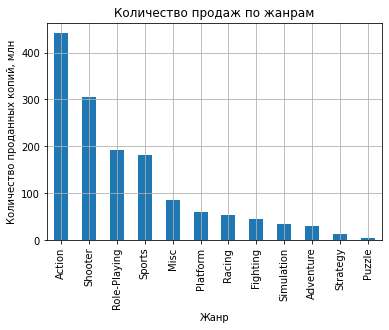

In [47]:
df_genre['sum'].plot(kind='bar', title=f'Количество продаж по жанрам', grid=True, \
                     xlabel=f'Жанр', ylabel=f'Количество проданных копий, млн')
pass

**Вывод:**  
**Прибыльность игр сильно зависит от жанра.**  
Больше всего продается `Action`, `Sports`, `Shooter`, меньше всего `Strategy`.

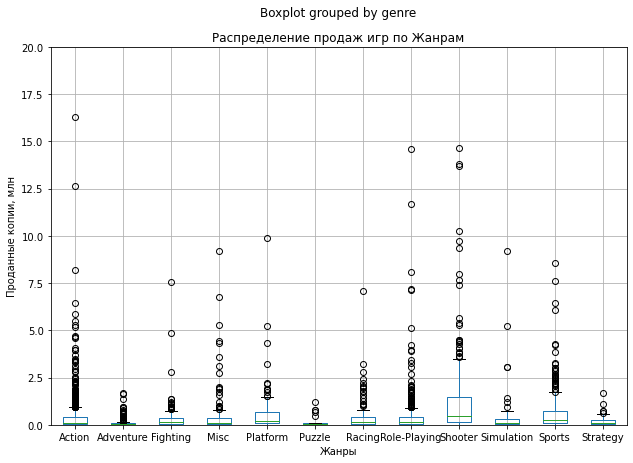

In [48]:
boxplot_name('genre', 'Распределение продаж игр по Жанрам', 'Жанры', 'Проданные копии, млн', 20)
pass

На первый взгляд самые продаваемые игры это `Экшн`, `Спорт`, `Шутер` и `Ролевые`. У всех жанров есть бестселлеры, кроме `Пазлов`, `Адвентур` <s>что понятно</s>, и `Стратегий` <s>что обидно</s>. Можно сказать что, самый перспективный жанр это `Шутер`, много бестселлеров, которые продаются значительно больше лучших игр других жанров. И в целом у `Шутер`ов и распределение больше, и медиана выше, что говорит об больших продажах большего количества игр.  
Рассотрим подробнее игры до 5 млн. проданных копий, надо понять где их больше и где они ближе к 5 млн.

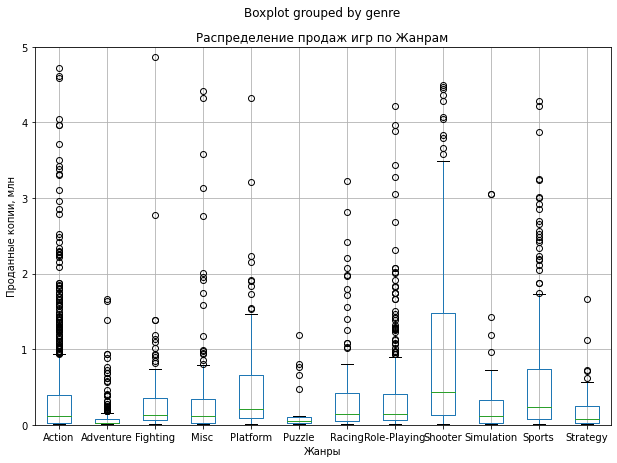

In [49]:
boxplot_name('genre', 'Распределение продаж игр по Жанрам', 'Жанры', 'Проданные копии, млн', 5)
pass

`Шутер` - вне конкуренции, хотя и `Экшн` выглядит очень неплохо, много игр продаваемы больше остальных жанров
Первоначальное мнеие подтвердилось. Лидеры - это `Шутер`, `Экшн`, `Спорт`, `Ролевые` и `Платформеры` с `Гонками`.
Аутсайдеры - `Адвентуры`, `Пазлы` и `Стратегии`.

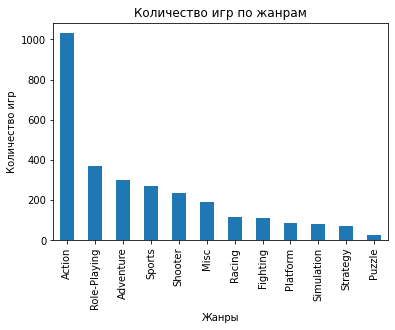

In [50]:
df_2011.groupby('genre')['name'].count().sort_values(ascending=False).\
                                 plot(kind='bar', ylabel='Количество игр', xlabel='Жанры', title='Количество игр по жанрам')
pass

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

Да, общие продажи - плохая метрика. Экшн вырвался вперед из-за очень большого количества игр.  
`Шутеры` - просто золотая жила.   
Сделал.
</div>

### Портрет пользователя каждого региона.

#### Самые популярные платформы (топ-5)

In [51]:
def share_of_sales(i='genre', s='na_sales'):
    platf_genre = {
        'platform' : 'sum',
        'genre' : 'median'
    }    
    result = df_2011.pivot_table(index=i, values=s, aggfunc=platf_genre[i]).sort_values(by=s, ascending=False)
    result['pct'] = round(result[s] / result[s].sum() *100) 
    return result

def get_share_of_sales(i='genre', s='na_sales', count_row=5): # count_row - сколько строк возвращать
    name = {
        'na_sales' : 'америке',
        'eu_sales' : 'европе',
        'jp_sales' : 'японии'
    }
    platf_genre = {
        'platform' : 'платформ',
        'genre' : 'жанров'
    }
    title = f'Распределение {platf_genre[i]} по долям в {name[s]}.'
    
    df_share_of_sales = share_of_sales(i, s)
    display(df_share_of_sales.iloc[:count_row,:])  
    df_share_of_sales.head(count_row).plot(kind='pie', figsize=(5, 5), y='pct', title=title)

,na_sales,pct
platform,,
X360,140.05,24.0
PS4,108.74,18.0
PS3,103.38,17.0
XOne,93.12,16.0
3DS,55.31,9.0


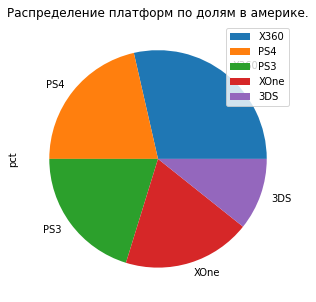

In [52]:
get_share_of_sales('platform', 'na_sales')

Самые популярные платформы в Америке  
`X360` - 24%  
`PS4` - 18%  
`PS3` - 17%  
`XOne` - 16%  
`3DS` - 9%

,eu_sales,pct
platform,,
PS4,141.09,28.0
PS3,106.86,21.0
X360,74.52,15.0
XOne,51.59,10.0
3DS,42.64,8.0


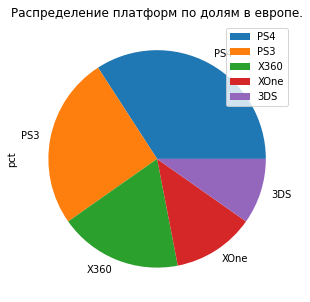

In [53]:
get_share_of_sales('platform', 'eu_sales')

Самые популярные платформы в Европе  
`PS4` - 28%  
`PS3` - 21%  
`X360` - 15%    
`XOne` - 10%    
`3DS` - 8%    
В Европе искренне любят `PlayStation`. Популярна и `PS3` и `PS4`, в то время как в Америке самая популярная платформа `X360`.
Но 5 лидеров одинаковые.

,jp_sales,pct
platform,,
3DS,87.79,46.0
PS3,35.29,18.0
PSV,21.04,11.0
PS4,15.96,8.0
WiiU,13.01,7.0


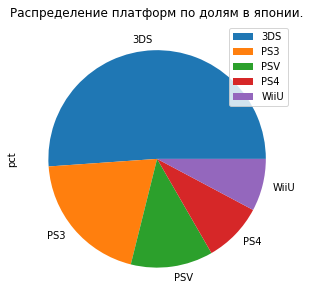

In [54]:
get_share_of_sales('platform', 'jp_sales')

Самые популярные платформы в Японии  
`3DS` - 46%  
`PS3` - 18%  
`PSV` - 11%     
`PS4` - 8%   
`Wii` - 7%    
В Японии платформа `3DS` очень популярна, такой доли рынка нет ни у одной платформы ни в одном регионе. Второе и четвертое место занимают `PS3` и `PS4`.

**Вывод:**  
Во всех странах очень популярны `PS3` и `PS4`, если ориентировать на продажи по всему миру, надо выбирать `PS4` как новую растущую платформу. Если ориентироваться на отдельные рынки, то в добавок к `PS4` можно посмотреть в Америке на `X360` и `XOne`, в Европе на `XOne` и все еще на `PS3`, в Японии обязательно на `3DS`.

#### Самые популярные жанры (топ-5)

,na_sales,pct
genre,,
Shooter,0.20,39.0
Platform,0.09,18.0
Sports,0.08,16.0
Fighting,0.05,10.0
Racing,0.04,8.0


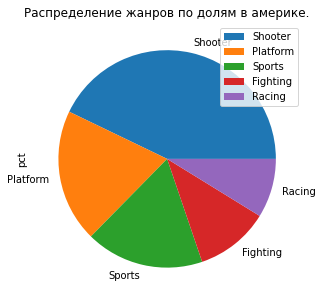

In [55]:
get_share_of_sales('genre', 'na_sales')

В Америке самые популярные жанры `Action`, `Sports`, `Shooter`, `Misc`, `Role-Playing` .  
На первом месте `Action` с заметным отрывом, на втором и третьем месте `Sports`, `Shooter` с почти равными долями.

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

В Америке самые популярные жанры `Shooter`, `Platform`, `Sports`, , `Fighting`, `Racing` .  
На первом месте `Shooter` с заметным отрывом, на втором и третьем месте `Platform`, `Sports` с почти равными долями.
</div>

,eu_sales,pct
genre,,
Shooter,0.17,34.0
Racing,0.09,18.0
Platform,0.08,16.0
Sports,0.05,10.0
Simulation,0.03,6.0


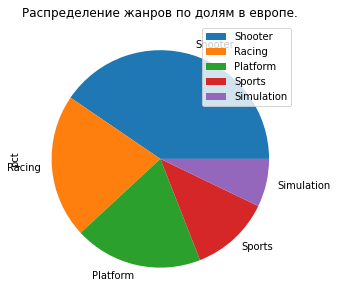

In [56]:
get_share_of_sales('genre', 'eu_sales')

В Европе самые популярные жанры `Action`, `Sports`, `Shooter`, `Misc`, `Racing` .  
Первые три совпадают с американскими.  Доли игр точно такие же.  
Вместо ролевых игр, европейцы увлекаются гонками.

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

В Европе самые популярные жанры `Shooter`, `Racing`, `Platform`, `Sports`, `Simulation`,  .  
На первом месте `Shooter` с заметным отрывом, на втором и третьем месте `Racing`, `Platform` с почти равными долями.
</div>

,jp_sales,pct
genre,,
Role-Playing,0.06,46.0
Fighting,0.03,23.0
Misc,0.02,15.0
Action,0.01,8.0
Adventure,0.01,8.0


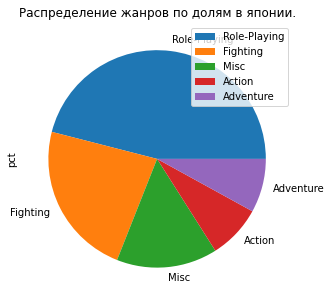

In [57]:
get_share_of_sales('genre', 'jp_sales')

Япония, как обычно, отличается от остальных стран. Самые популярные жанры `Role-Playing`, `Action`, `Misc`, `Sports`, `Platform` .    
Самый популярный жанр `Ролевые Игры` занимает 30 %, такую большую долю рынка ни занимает ни один жанр в других странах.  
Также в топ-5 входят `Платформеры`. А вот `Стрелялки` японцы совсем не покупают. Возможно это связанно с цензурой игр.

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

В Японии самые популярные жанры `Role-Playing`, `Fighting`, `Misc`, `Action`, `Adventure`,  .  
Самый популярный жанр Ролевые Игры занимает 46 %, это очень много.
</div>

**Вывод:** 
Самые популярные жанры в Америке и Европе совпадают это `Экшн`, `Спорт` и `Стрелялки`, дальше начинаются различия. В Европе любят `Гонки` и Америке `Ролевые игры`.  
В Японии первое место с громадным отрывом занимают `Ролевые игры`, потом как в Америке `Экшн`, `Спорт` и `Разные`, на последнем месте `Платформеры`. `Стрелялки` в топ-5 в Японии не входят <s>даже близко</s>.

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

Вывод: Самый популярный жанры в Америке и Европе это Стрелялки. Остальные жанры одинаковы, но занимаю разные места и европейцы Дракам предпочитают Симуляторы. В Японии первое место занимают Ролевые игры, потом Драки, остальные жанры не совпадают ни с американскими, ни с европейскими. Японцы играют совсем в другие игры. Стрелялки в топ-5 в Японии не входят.
</div>

#### Влияние рейтинаг ESRB на продажи в отдельном регионе.

In [58]:
name = {
    'na_pct' : 'na_sales',
    'eu_pct' : 'eu_sales',
    'jp_pct' : 'jp_sales',
    'other_pct' : 'other_sales'
}
rank = ['Для всех', 'От 10', 'Взрослым', 'Подросткам', 'Рейтинг неопределен']

df_rank = df_2011.pivot_table(index='rating', values=name.values(), aggfunc=['sum'])

for n in name:
    df_rank[n] = round(df_rank[('sum', name[n])] / df_rank[('sum', name[n])].sum() *100)
df_rank = df_rank.iloc[:, len(name):]
df_rank['value'] = rank
df_rank

,na_pct,eu_pct,jp_pct,other_pct,value
,,,,,
rating,,,,,
E,19.0,22.0,15.0,20.0,Для всех
E10+,13.0,11.0,4.0,10.0,От 10
M,39.0,38.0,11.0,41.0,Взрослым
T,11.0,10.0,14.0,11.0,Подросткам
Unknown,17.0,18.0,57.0,17.0,Рейтинг неопределен


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Вывод:</b> 
    
Самый продаваемый рейтинг по всем странам, кроме Японии - "Для взрослых".
    
В Японии три из пяти проданных игр, игры с неопределенным рейтингом.
    
В Америке и Европе и других странах (кроме Японии) продажи по рейтингам примерно одинаковые.
    
В Японии продается совсем мало детских игр и больше игр для подростков, чем в других регионах.
    
<b>Япония сильно отличается от других регионав по продажам игр в зависимости от рейтинга.</b> 
</div>    

Из из данных следует, что в Японии покупают в 2 раза меньше игр для взрослых и в полтора раза больше игр для подростков, чем в остальных странах. <s>Похоже взрослым японцам совсем не до игр, работать надо.</s>

**Вывод:**  
**Рейтинги ESRB влияют на продажи игр в отдельных странах.**  

### Проверка гипотез.

#### Первая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем нулевую и альтернативную гипотезы.
- нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равные.
- альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.
- уровень статистической значимости установим в 1 %. 

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>

Поправил.
</div>

In [59]:
s = 'Нулевую гипотезу сохраняем. \nCредние пользовательские рейтинги платформ Xbox One и PC равны.' # нулевая гипотеза

t_test = st.ttest_ind(df_2011.query("platform == 'PC'")['user_score'].dropna(),\
              df_2011.query("platform == 'XOne'")['user_score'].dropna())
if t_test.pvalue < 0.01:
    s = 'Нулевую гипотезу отвергаем.\nCредние пользовательские рейтинги платформ Xbox One и PC - РАЗНЫЕ.'
print(f"p-value = {t_test.pvalue*100} %\n{s}")

p-value = 55.35080500643661 %
Нулевую гипотезу сохраняем. 
Cредние пользовательские рейтинги платформ Xbox One и PC равны.


Вероятность получить такое значение выборочного среднего в <div class = "alert alert-info" style="border-left: 7px solid blue"> актуальном периоде очень велика (55.35%) - сохраняем нулевую гипотезу, </div> о том, что рейтинги платформ Xbox One и PC одинаковые.

**Вывод:**  
Наша гипотеза о том, что рейтинги платформ Xbox One и PC одинаковые не верна. Средние пользовательские рейтинги платформ Xbox One и PC РАЗНЫЕ.

 <div class = "alert alert-info" style="border-left: 7px solid blue">
Вывод:
Наша гипотеза о том, что рейтинги платформ Xbox One и PC одинаковые ВЕРНА. Средние пользовательские рейтинги платформ Xbox One и PC за АКТУАЛЬНЫЙ ПЕРИОД ОДИНАКОВЫЕ.   
</div>

#### Вторая гипотеза - средние пользовательские рейтинги жанров Action  и Sports разные.

Сформируем нулевую и альтернативную гипотезы.
- нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны.
- альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные.  
- уровень статистической значимости установим в 1 %.

In [60]:
s = 'Нулевую гипотезу сохраняем. \nCредние пользовательские рейтинги жанров Action и Sports - РАВНЫ.' # нулевая гипотеза

t_test = st.ttest_ind(df_2011.query("genre == 'Action'")['user_score'].dropna(),\
              df_2011.query("genre == 'Sports'")['user_score'].dropna())
if t_test.pvalue < 0.01:
    s = 'Нулевую гипотезу отвергаем. \nCредние пользовательские рейтинги жанров Action и Sports разные.'
print(f"p-value = {t_test.pvalue*100} %\n{s}")

p-value = 3.7163089460934875e-24 %
Нулевую гипотезу отвергаем. 
Cредние пользовательские рейтинги жанров Action и Sports разные.


Вероятность получить такое значение выборочного среднего <div class = "alert alert-info" style="border-left: 7px solid blue">очень мала - отвергаем нулевую гипотезу,</div>
о том, что рейтинги жанров Action и Sports равны.

**Вывод:**  
Нулевая гипотеза всегда формулируется через равенство, поэтому я выбрал их таким образом.  
Критический уровень статистической значимости я установил - 1 %.
Проверили 2 гипотезы, обе оказались не верные.  
**Cредние пользовательские рейтинги платформ Xbox One и PC - РАЗНЫЕ.**  
**Cредние пользовательские рейтинги жанров Action и Sports - РАВНЫ.**  

**Вывод:** 
Наша гипотеза о том, что средние рейтинги жанров Action и Sports разные не верна. Средние рейтинги жанров Action и Sports одинаковые.

<div class = "alert alert-info" style="border-left: 7px solid blue">
Вывод:
    
Нулевая гипотеза всегда формулируется через равенство, поэтому я выбрал их таким образом.
    
Критический уровень статистической значимости я установил - 1 %.
    
Первая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые - оказалась верной,
рейтинги платформ Xbox One и PC в актуальной периоде - одинаковые.
    
Вторая гипотеза - средние пользовательские рейтинги жанров Action и Sports разные - оказалась верной,
рейтинги жанров Action и Sports в актуальной периоде - разные.
    
Проверили 2 гипотезы, обе оказались верные.
</div>

### Общий вывод.

В этой работе я исследовал данные о продажах компьютерных игр.
Исследование состояло из следующих этапов:
1. Получение и обзор данных.
    - открытие файла
    - получение общей информации
    - вывод гистограмм по каждому столбцу
2. Преобработка данных.
    - изменение регистра названий столбцов
    - удаление пропусков
    - проверка на явные дубликаты
    - изменение типа столбцов
    - изменение значения `tbd` в столбце `user_score`
3. Анализ данных.
    - не все периоды важны для исследования, данные до 1991 года можно не рассматривать.
    - сформировал суммы продаж на все годы по всем платформам. Медиана равна 200 млн. копий.
    - характерный период жизни платформы 8 лет (удачной 10-11).
    - рассматривать имеет смысл данные за последние 8 лет, если нужно оценить продолжительность жизни платформы, если нужно оценить только текущую динамику, можно смотреть  последние 4 года.
    - самые удачные платформы - `Wii, DS, X360, PS3`.
    - построил график динамики и распределения продаж по платформам.
    - проанализировал зависимость продаж от отзывов. построил графики рассеивания и посчитал корреляцию. количество продаж от отзывов зависит, но не сильно и в основном от отзывов критиков. 
    - самые популярные жанры Action, Sports, Shooter, самый не популярный Strategy.
4. Составление портрета пользователя.
    - самые популярные платформы в Америке X360, в Европе PS3, в Японии DS.
    - самые популярные жанры Action, Sports, Shooter, Role-Playing.
    - рейтинги ESRB влияют на продажи игр в отдельных странах (в Японии).
5. Проверка заданных гипотез.
    - проверена гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Верна.
    - проверена гипотеза - средние пользовательские рейтинги жанров Action и Sports разные. Верна.
    
Исследование показало, что:  
**В 2017 году надо сосредоточится на играх для платформ `PS4, XOne`, возможно немного `РС`. Самый лучший жанр `Shooter`, потом `Action`, `Sports`, `Role-Playing`, на которые есть высокие оценки критиков, с рейтингом Для всех, Для взрослых или с неопределенным рейтингом.**

<div class = "alert alert-info" style="border-left: 7px solid blue">
Вывод:
    
Самая перспективная платформа - PS4.
    
Самый перспективный жанр - Shooter.
    
Лучше всего рейтинг "Для Взрослых" или неопределен.
    
Продажи несколько зависят от мнения критиков, и не зависят от мнения игроков.
</div>